In [112]:
import pandas as pd
from wordcloud import WordCloud


df = pd.read_excel('google_Snake_Clash_reviews.xlsx')

df


,날짜,평점,리뷰 내용
0,2024년 2월 7일,2점,"게임을 사흘 째 이용하는 사람입니다. 일단 장점과 단점을 말해드리자면, 장점은 자신..."
1,2024년 2월 9일,2점,1. 획득한 골드를 광고를 보면 미니게임으로 1~4배 사이로 정해서 획득할 수 있는...
2,2024년 2월 25일,1점,5점이 왜케 많아 일단 광고 많은 건 기본임 한 판 끝나고 광고나옴 그리고 이벤트성...
3,2024년 2월 8일,1점,잘 만들었음 계속 중독성 있는 게임임 But 하지만 망겜임 하지만 되지도 않는 레벨...
4,2024년 3월 14일,1점,제가 15개 게임에 리뷰를 달았는데 그중에서 제일 안좋은것 같네요 원래 게임에도 1...
...,...,...,...
422,2024년 4월 19일,5점,재밌습니다^^
423,2024년 2월 12일,1점,광고 애바야
424,2023년 10월 14일,4점,광고
425,2023년 12월 10일,1점,광고...


In [113]:
df['리뷰 내용'] = df['리뷰 내용'].str.replace('[^가-힣]', ' ', regex = True)
df['리뷰 내용']


0      게임을 사흘 째 이용하는 사람입니다  일단 장점과 단점을 말해드리자면  장점은 자신...
1         획득한 골드를 광고를 보면 미니게임으로    배 사이로 정해서 획득할 수 있는...
2       점이 왜케 많아 일단 광고 많은 건 기본임 한 판 끝나고 광고나옴 그리고 이벤트성...
3      잘 만들었음 계속 중독성 있는 게임임     하지만 망겜임 하지만 되지도 않는 레벨...
4      제가   개 게임에 리뷰를 달았는데 그중에서 제일 안좋은것 같네요 원래 게임에도  ...
                             ...                        
422                                              재밌습니다  
423                                               광고 애바야
424                                                   광고
425                                                광고   
426                                                   존잼
Name: 리뷰 내용, Length: 427, dtype: object

In [114]:
X = df['리뷰 내용']

In [115]:

from soynlp.noun import LRNounExtractor # noun extracter v1
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(X) # list of str like

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (363, 203) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 21 nouns are extracted


In [116]:
!apt -qq -y install fonts-nanum

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



In [117]:
print(list((nouns.keys()))[:200]) #v1 버전으로 추출한 명사 예시입니다

['안보', '처음', '결제', '광고', '정도', '환불', '제거', '한판', '하나', '레벨', '시간', '구매', '보스', '봐야', '시작', '광고제', '플레이', '사람들', '제한시간', '광고제거', '업데이트']


In [118]:
# Import necessary libraries
from soynlp.noun import LRNounExtractor
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 명사 추출기를 초기화합니다.
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(X)

# 명사와 그 빈도를 딕셔너리로 추출합니다.
frequencies = {noun: score.frequency for noun, score in nouns.items()}



[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (363, 203) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 21 nouns are extracted


In [119]:
if '하나' in frequencies:
    del frequencies['하나']


In [120]:
if '게임' in frequencies:
    del frequencies['게임']


In [121]:
if '하지' in frequencies:
    del frequencies['하지']


In [122]:
if '로벅스로블' in frequencies:
    del frequencies['로벅스로블']


In [123]:
if '로블록스' in frequencies:
    del frequencies['로블록스']


In [124]:
frequencies

{'안보': 5,
 '처음': 6,
 '결제': 10,
 '광고': 219,
 '정도': 9,
 '환불': 16,
 '제거': 15,
 '한판': 16,
 '레벨': 17,
 '시간': 34,
 '구매': 8,
 '보스': 22,
 '봐야': 7,
 '시작': 3,
 '광고제': 1,
 '플레이': 11,
 '사람들': 5,
 '제한시간': 21,
 '광고제거': 41,
 '업데이트': 6}

In [125]:
if '로블' in frequencies:
    del frequencies['로블']


In [126]:
if '로벅스' in frequencies:
    del frequencies['로벅스']


In [127]:
if '안녕' in frequencies:
    del frequencies['안녕']
if '화면' in frequencies:
    del frequencies['화면']


In [128]:
if '감사' in frequencies:
    del frequencies['감사']
if '게임들' in frequencies:
    del frequencies['게임들']


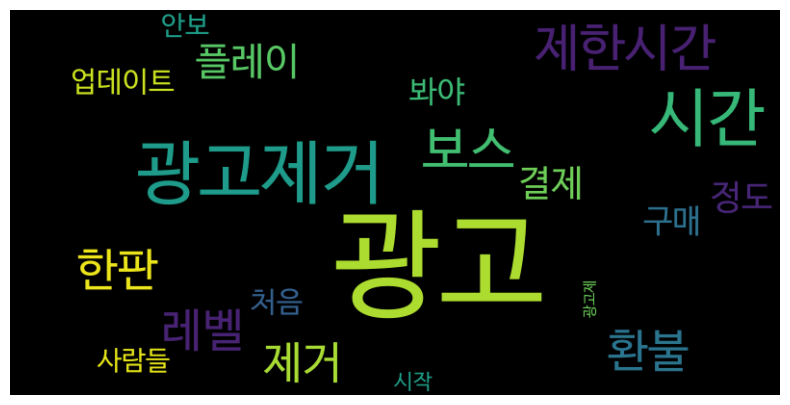

In [129]:
# 워드 클라우드를 생성합니다.
wordcloud = WordCloud(font_path='../../Library/fonts/NanumBarunGothic.otf', width=800, height=400).generate_from_frequencies(frequencies)

# 워드 클라우드를 표시합니다.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 번호와 틱을 끕니다.
plt.show()
